<img src="./images/logo.png" alt="utech academy">

<div class="alert">
<div style="direction:ltr;text-align:left;font-family:Tahoma; font-size:16pt"> Perceptron
</div>
</div>

<img src="./images/perceptron_schematic_overview.png" alt="Perceptron Schematic">
<a href="http://ataspinar.com/wp-content/uploads/2016/11/perceptron_schematic_overview.png">Reference</a>

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Import the required libraries.<br>
</div>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from scipy import io

<div style="direction:ltr;text-align:left;font-family: Tahoma">
The function to load the preprocessed dataset:<br>
</div>

In [2]:
def load_hoda(dataset_dir, training_sample_size=1000, test_sample_size=200, size=5):
    # Load the dataset
    trs = training_sample_size
    tes = test_sample_size
    dataset = io.loadmat(dataset_dir)

    # Split training and test set
    X_train_orginal = np.squeeze(dataset['Data'][:trs])
    y_train = np.squeeze(dataset['labels'][:trs])
    X_test_original = np.squeeze(dataset['Data'][trs:trs+tes])
    y_test = np.squeeze(dataset['labels'][trs:trs+tes])

    # Resize the dataset
    X_train_5by5 = [cv2.resize(img, dsize=(size, size)) for img in X_train_orginal]
    X_test_5by_5 = [cv2.resize(img, dsize=(size, size)) for img in X_test_original]
    
    # Reshape the dataset
    X_train = [x.reshape(size*size) for x in X_train_5by5]
    X_test = [x.reshape(size*size) for x in X_test_5by_5]
    
    return X_train, y_train, X_test, y_test

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Loading the dataset:
</div>

In [3]:
# Load the dataset
X_train, y_train, X_test, y_test = load_hoda(dataset_dir='./datasets/hoda.mat')

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Displaying the dataset:
</div>

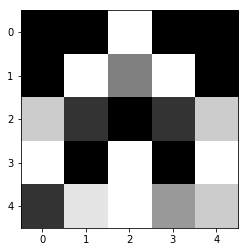

In [4]:
plt.imshow(X_train[1].reshape((5, 5)), cmap='gray')

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Normalize the dataset between 0 and 1:
</div>

In [5]:
x_train = np.array(X_train).astype('float32')
x_test = np.array(X_test).astype('float32')

x_train /= 255
x_test /= 255

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Defining the classifier:
</div>

In [6]:
# OVA (One-Vs-All) in multicalss classification
perceptron = Perceptron(verbose=1)

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Fitting the classifier:
</div>

In [7]:
perceptron.fit(x_train, y_train)

-- Epoch 1
Norm: 15.69, NNZs: 25, Bias: -17.000000, T: 1000, Avg. loss: 0.257952
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 17.71, NNZs: 25, Bias: -21.000000, T: 2000, Avg. loss: 0.142073
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 18.93, NNZs: 25, Bias: -24.000000, T: 3000, Avg. loss: 0.126257
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 20.46, NNZs: 25, Bias: -28.000000, T: 4000, Avg. loss: 0.116755
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 21.34, NNZs: 25, Bias: -30.000000, T: 5000, Avg. loss: 0.123382
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 23.00, NNZs: 25, Bias: -31.000000, T: 6000, Avg. loss: 0.073633
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 25.20, NNZs: 25, Bias: -31.000000, T: 7000, Avg. loss: 0.045623
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 24.56, NNZs: 25, Bias: -34.000000, T: 8000, Avg. loss: 0.075340
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 23.55, NNZs: 25, Bias: -37.000000, T: 9000, Avg. loss: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=1, warm_start=False)

In [8]:
perceptron.coef_

array([[-13.48235255,   5.286275  ,   4.01960781,   2.18039282,
         -2.79215645,   2.72156896,  -1.69411778,   3.16470563,
         -1.91764713,   9.66666704,   8.37647077,   8.49803941,
         -5.73333317,   0.35686272,   6.93725457,   5.69411786,
          6.93725494,  -0.8588235 ,   6.11372569,   0.89411779,
         -2.54117596,   3.16470591,   0.30588257,   1.4313733 ,
         -6.26274475],
       [  4.81568592,   4.8274505 ,   0.34117621,   3.37647019,
         -5.88627466,  -3.79607848,  -1.38823505,   3.60784295,
         -2.15686286,   0.1921569 ,  -9.32941151,  -1.96862723,
          6.96078381,   5.09019665,   2.01568644,  -3.65098011,
          4.26666688,   8.05882389,   2.48627457,   0.50588292,
         -0.73333346,   1.5450982 ,  -3.70588255,   2.94117606,
          6.06274524],
       [  5.82745068,  -0.62352893,  -9.90588263,   6.31764848,
         15.84705824,  -0.57647111,   3.77647041,   1.85490199,
          1.33725629,  -0.18823527,  -8.10196086,   2.4901

In [9]:
perceptron.intercept_

array([-39., -29., -22.,  -5.,  -1.,  -5.,   2.,   0.,  -5., -13.])

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Evaluating the classifier:
</div>

In [10]:
accuracy = perceptron.score(x_test, y_test)
print("Accuracy is %.2f %%" %(accuracy * 100))

Accuracy is 84.50 %


<div style="direction:ltr;text-align:left;font-family: Tahoma">
Predicting with the classifier:
</div>

In [11]:
sample = 20

X = [x_test[sample]]

predicted_class = perceptron.predict(X)
actual_class = y_test[sample]

print ("The actual label is '{}' and the prediction is '{}'".format(actual_class, predicted_class[0]))

The actual label is '0' and the prediction is '0'


In [12]:
pred_classes = perceptron.predict(x_test)
true_classes = y_test

print("Predicted classes:")
print(pred_classes)
print("Actual classes:")
print(y_test)

Predicted classes:
[7 2 7 5 5 5 4 7 3 2 0 8 6 0 7 9 3 6 7 4 0 3 6 3 1 2 7 5 2 6 7 5 5 8 9 6 5
 1 4 8 8 7 7 7 1 2 7 9 0 3 7 5 7 5 7 8 8 2 9 8 8 6 6 6 7 6 2 4 2 4 4 5 9 1
 8 2 0 5 6 2 4 6 2 7 7 7 7 1 8 1 7 8 7 7 8 9 7 2 3 1 0 2 9 7 3 5 5 0 0 9 7
 7 9 3 9 6 8 7 9 2 5 2 5 5 9 6 9 2 7 3 7 6 5 7 9 0 3 1 8 2 2 3 7 2 9 6 8 2
 7 0 9 6 0 7 6 5 4 7 6 3 7 0 7 6 9 4 7 3 4 1 5 6 7 9 1 3 5 3 5 7 4 1 3 3 1
 1 3 3 8 9 6 7 7 6 3 0 1 7 9 5]
Actual classes:
[7 2 3 1 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 7 5 5 8 9 6 5
 1 4 8 8 4 7 7 1 2 7 9 0 3 7 4 7 5 2 9 8 2 9 8 8 6 6 6 6 6 2 4 3 4 4 5 9 1
 8 2 0 5 6 2 4 3 2 7 7 7 7 1 8 1 7 8 7 7 8 9 3 2 3 1 0 2 9 6 3 5 5 0 0 3 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 6 5 2 9 0 4 1 8 2 2 3 0 2 9 3 8 6
 7 0 9 9 0 7 6 5 4 7 9 3 7 0 7 1 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 7 4 1 3 3 1
 2 3 3 8 9 6 7 7 2 3 0 1 4 9 5]


<div class="alert">
<div style="direction:ltr;text-align:left;font-family:B Tahoma"> Machine Learning Course
<br>Vahid Reza Khazaie<br>
</div>
<a href="https://www.linkedin.com/in/vahidrezakhazaie/">LinkedIn</a> - <a href="https://github.com/vrkh1996">GitHub</a>

</div>